In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [3]:
df = pd.read_csv('Mall_Customers.csv')


In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
x = df.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


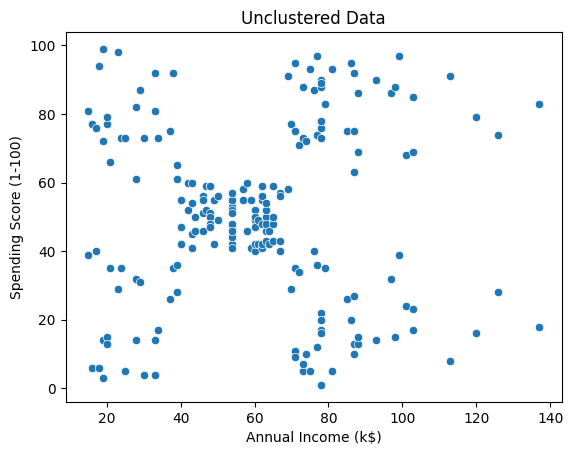

In [6]:
import matplotlib.pyplot as plt  # Import the correct submodule

plt.title('Unclustered Data')
sns.scatterplot(x=x['Annual Income (k$)'], y=x['Spending Score (1-100)'])
plt.show()  # This will display the plot


In [7]:
from sklearn.cluster import KMeans

In [8]:
from sklearn.cluster import  AgglomerativeClustering

In [9]:
km = KMeans(n_clusters=4)

In [10]:
km.fit_predict(x)

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [11]:
#sse
km.inertia_

73880.64496247194

In [12]:
sse =[]
for k in range(1,16):
    km = KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)

In [13]:
sse

[269981.28,
 184609.98434090617,
 106348.37306211118,
 73679.78903948836,
 44454.47647967974,
 37455.98455516028,
 33876.17697819421,
 30588.53765561156,
 26245.0756541585,
 20378.38544690118,
 18509.764147226735,
 16408.95739142538,
 15757.49094058116,
 14888.560579730016,
 12363.05238095238]

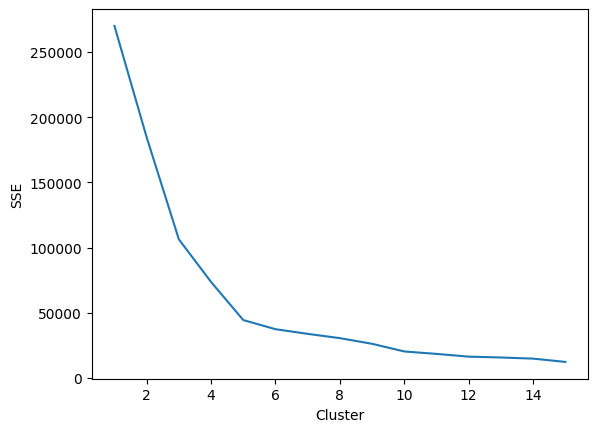

In [14]:
sns.lineplot(x=range(1,16), y=sse)
plt.xlabel('Cluster')
plt.ylabel('SSE')
plt.show()


In [15]:
#Method second or alternative for elbow method
from sklearn.metrics import silhouette_score

In [16]:
silh =[]
for k in range(2,16):
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(x)
    score = silhouette_score(x, labels)
    silh.append(score)

In [17]:
silh

[np.float64(0.38908480253667166),
 np.float64(0.46761358158775435),
 np.float64(0.4931963109249047),
 np.float64(0.553931997444648),
 np.float64(0.5082526725498011),
 np.float64(0.5288104473798049),
 np.float64(0.45481197931195283),
 np.float64(0.43587999863147603),
 np.float64(0.4499261454462227),
 np.float64(0.42527222445793567),
 np.float64(0.4331677156781082),
 np.float64(0.4084720119474926),
 np.float64(0.41880063710220555),
 np.float64(0.4167340033012815)]

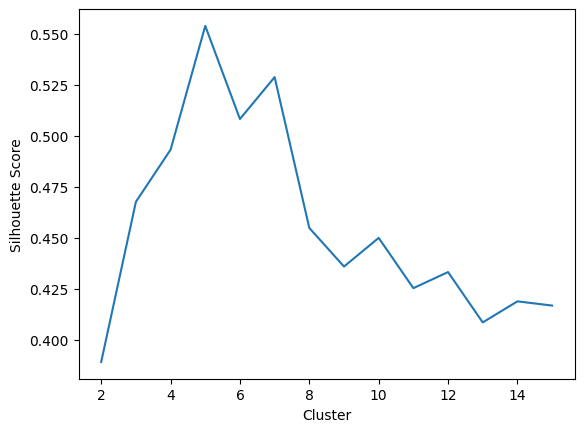

In [18]:
sns.lineplot(x=range(2,16), y=silh)
plt.xlabel('Cluster')
plt.ylabel('Silhouette Score')
plt.show()


<BarContainer object of 14 artists>

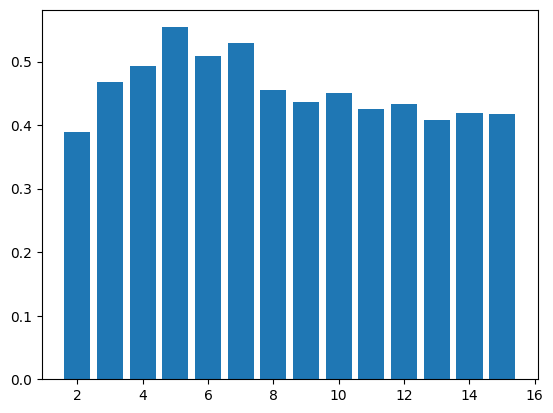

In [19]:
plt.bar(range(2,16,1),silh)

In [20]:
km = KMeans(n_clusters=5,random_state=1)

In [21]:
labels = km.fit_predict(x)

In [22]:
km.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [23]:
cent = km.cluster_centers_

<Axes: title={'center': 'Clustered Data'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

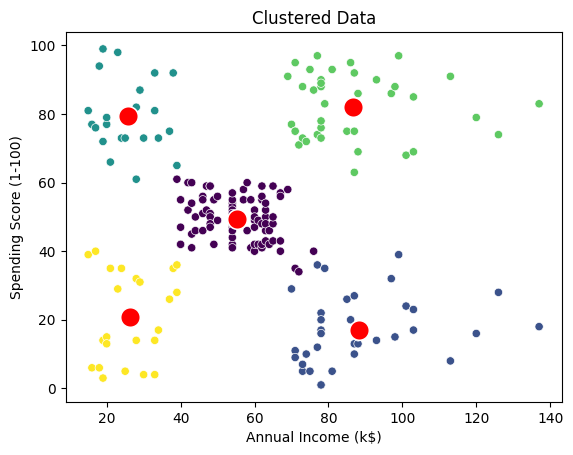

In [24]:
plt.title('Clustered Data')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'],c=labels )
sns.scatterplot(x=cent[:,0],y=cent[:,1], s=200, color='red')



In [25]:
df[labels==0]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
43,44,Female,31,39,61
46,47,Female,50,40,55
47,48,Female,27,40,47
48,49,Female,29,40,42
49,50,Female,31,40,42
...,...,...,...,...,...
121,122,Female,38,67,40
122,123,Female,40,69,58
126,127,Male,43,71,35
132,133,Female,25,72,34


In [26]:
agl = AgglomerativeClustering(n_clusters=5)

In [27]:
alabels = agl.fit_predict(x)

In [28]:
alabels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

<Axes: title={'center': 'KMEANS'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

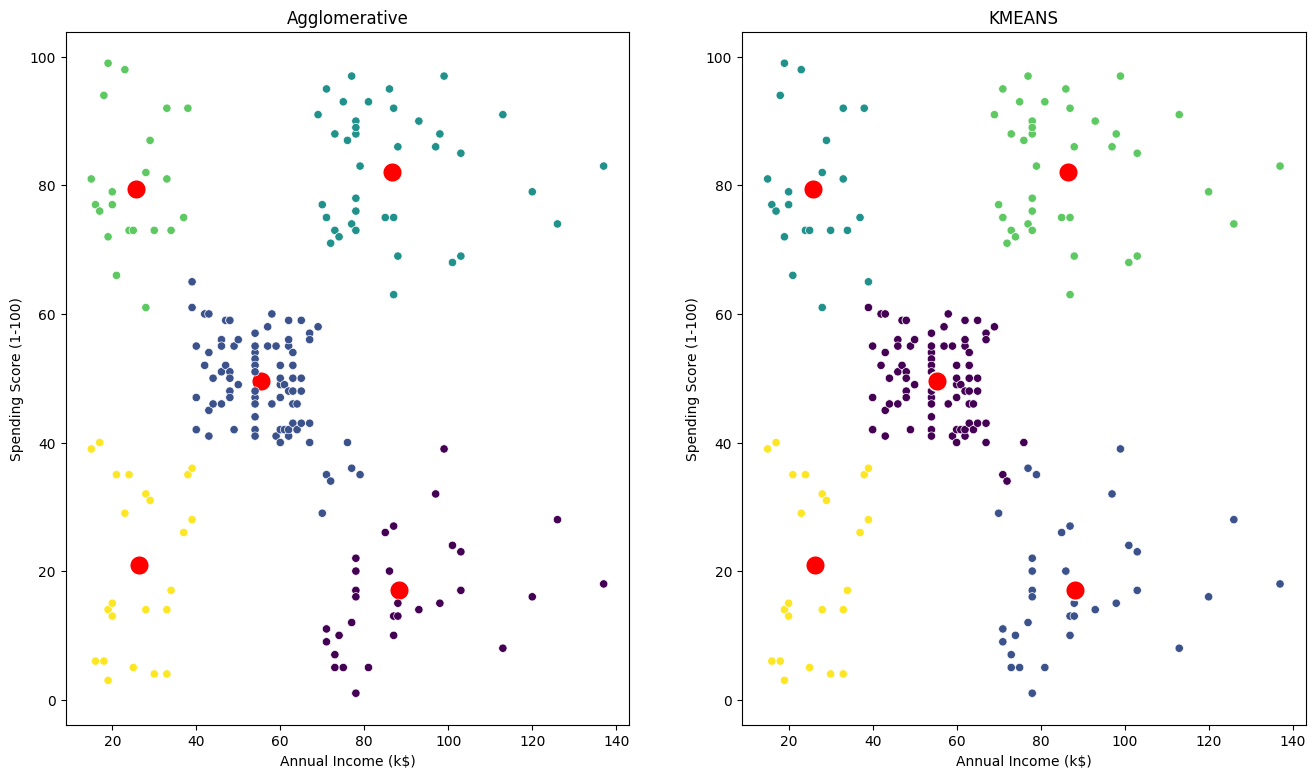

In [30]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Agglomerative')
sns.scatterplot(x=cent[:,0],y=cent[:,1], s=200, color='red')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'], c= alabels)

plt.subplot(1,2,2)
plt.title('KMEANS')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'],c=labels )
sns.scatterplot(x=cent[:,0],y=cent[:,1], s=200, color='red')